The most important part of this game simulation are the strategies used to play it. In order to determine the best strategies for the game, it would seem logical to first observe the behaviour of the various elements of the game.

In [2]:
# necessary imports
from logic import get_distinct_parts
from game_entities import Player
import matplotlib.pyplot as plt

We can check the probabilities for each result of the 2 dice sum to see which results are rarest and most common -

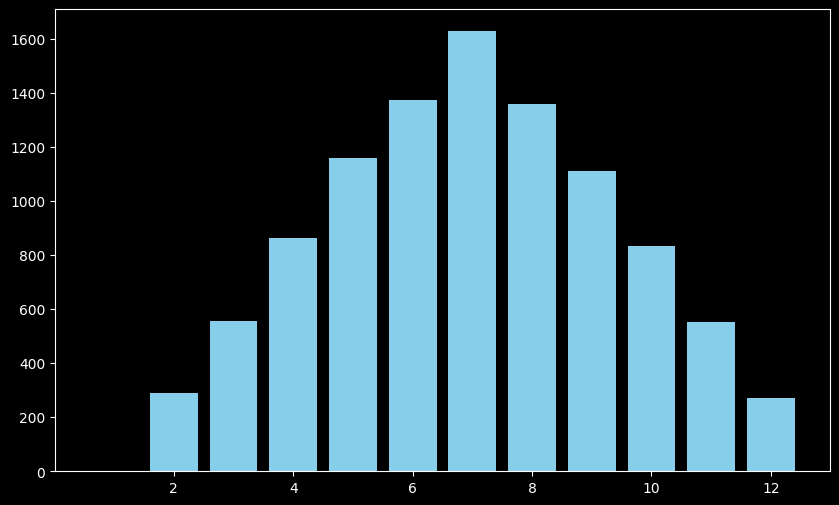

In [3]:
# Checking dice result probabilities to design optimal strategy
num_dic = {i+1: 0 for i in range(12)}

p = Player(1)
for i in range(10000):
    num_dic[p.roll_n_dice(2)] += 1

categories = list(num_dic.keys())
frequencies = list(num_dic.values())

plt.figure(figsize=(10, 6))
plt.bar(categories, frequencies, color='skyblue')

# Display the plot
plt.show()

As we can see in the bar chart, the result is a normal distribution with the dice-sum being 7 for the maximum amount of cases and decreasing as we move away from the middle. A possible way to interpret this information in the context of the game is that one should try to choose combinations that prioritize the rarer numbers. For example, choosing 3 and 4 instead of a 7 when the dice roll to a total of 7.

We can also check how many combinations are possible for each dice result for each game.

In [6]:
# Checking the number of combinations possible for each dice result for a 2-dice game:
for i in range(1, 13):
    print(i, "- Number of possible combos:", len(get_distinct_parts(i)))

1 - Number of possible combos: 1
2 - Number of possible combos: 1
3 - Number of possible combos: 2
4 - Number of possible combos: 2
5 - Number of possible combos: 3
6 - Number of possible combos: 4
7 - Number of possible combos: 5
8 - Number of possible combos: 6
9 - Number of possible combos: 8
10 - Number of possible combos: 10
11 - Number of possible combos: 12
12 - Number of possible combos: 15


Naturally, the number of combinations will increase as the number does. Could this mean that one should prioritize smaller numbers, as there is a lower chance for a combination to be available for them? This information is not enough to draw any concrete conclusions. Thus, we will need to continue the investigation. We need to observe the combinations of the bigger numbers and their dependency on the smaller ones.

In [12]:
# Get all possible combinations into a single set
master = set()
for i in range(1,13):
    master.update(get_distinct_parts(i))

# Initializing a dictionary to record frequency
freq_dic = {n: 0 for n in range(1, 13)}

# Appending to the dictionary
for combo in master:
    for num in combo:
        freq_dic[num] += 1

print(freq_dic)

# THIS IS WRONG! 11 AND 12 ARE NOT ALLOWED HERE AS THEY ARE NO TILES FOR THESE NUMBERS!


{1: 31, 2: 27, 3: 23, 4: 19, 5: 16, 6: 13, 7: 10, 8: 7, 9: 5, 10: 3, 11: 2, 12: 1}


Here, we see that the frequency of a number decreases as it increases. Of course, this is also expected. 1 can be part of a combination for all numbers except of 2. 2 for 3 and above except 4, and so on.